# Explorative Analysis for IMDB
- This notebook explores data from IMDB to try and understand the nature and relationship of the various movies.
- It involves combining different columns, filtering data to derive concrete conclusions and recommendations.

## Importing of libraries
- Import necessary libraries for analysis.
   1. Pandas - to be able to read different files, create dataframes, manipulate the dataframes one way or another.
   2. Numpy - this is a library imported for purposes of mathematical analysis/computations.
   3. Matplotlib- is a library used for the visualizations.
   4. Seaborn - is also a library used in collaboration with matplotlib for visualizations

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing of Sqlite3
- We use Sqlite3 to read the imdb file since it is an sqlite database. Can't be opened by pandas. 
- The database contains a  number of tables in it which need to be accessed for analysis purposes.

In [2]:
#read the imdb dataset 
#since it's a database we use sql
import sqlite3

#create a connection to the database
conn = sqlite3.connect('Data/im.db/im.db')

#create a cursor
cur = conn.cursor()
#read all the tables in the database
cur.execute("""
            SELECT name FROM sqlite_master WHERE type='table';""")

#fetch all the tables
tables = cur.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

* Now that we know the names of all tables present in the database, we can check through each table to see which content is useful and which one is not.
* First, we analyze the movie_basics table and movie_ratings table.

In [3]:
#read the movie basics table
movie_basics = pd.read_sql(
    """
    SELECT * FROM movie_basics
    """, conn)

#read the movie ratings table
movie_ratings = pd.read_sql(
    """
    SELECT * FROM movie_ratings
    """, conn)


In [4]:
#check the first 5 rows of the movie_basics table
movie_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


- As we can see, movie_basics has the movie_id, primary_title and original title of the movie, the start year, runtime_minutes(basically how long the movie is) and the genres of the movie. All of these column would be very helpful in the analysis.

In [5]:
#check the shape of the movie_basics table
print(movie_basics.shape)
#confirm the columns are of the right data type
print(movie_basics.dtypes)
#check for null values in movie basics in descending order
movie_basics.isnull().sum().sort_values(ascending= False)


(146144, 6)
movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


runtime_minutes    31739
genres              5408
original_title        21
movie_id               0
primary_title          0
start_year             0
dtype: int64

- As we can see above, the movie_basics table columns are of the right data types but some of the columns have missing values. Thus, we need to analyze each column with missing values to see how to handle the missing values.

- Starting of with the runtime_minutes column, since it's numerical in nature,we can use the .describe() method to check the count, mean, min and max value and the values at the various percentiles.

In [6]:
movie_basics['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

* Since the runtime_minutes column most of the values are between 70 and 99 (the 25th and 75th percentile), we can easily replace the missing values with the mean.

In [7]:
#for the column runtime_minutes column fill  the null values with the mean
#create a copy of the movie_basics table
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean())

In [8]:
movie_basics.isnull().sum().sort_values(ascending=False)

genres             5408
original_title       21
movie_id              0
primary_title         0
start_year            0
runtime_minutes       0
dtype: int64

- Onto the next column with missing values, genres. Since it's categorical in nature we can inspect the unique values and their counts.

In [9]:
#since genres is a categorical column we check the value counts
movie_basics['genres'].value_counts()

genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: count, Length: 1085, dtype: int64

- The unique values are quite a number thus replacing missing values with the mode will not make sense. Instead, we create a new value known as unknown.

In [10]:
#fill the null values in genre will unknown
movie_basics['genres'] = movie_basics['genres'].fillna('Unknown')

In [11]:
#check null values
movie_basics.isnull().sum().sort_values(ascending=False)

original_title     21
movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
dtype: int64

- Lastly, original_title has 21 missing values. Since we can't guess the original titles of each, we can easily replace the missing values with the primary_titles of the books, since they both refer to the same book.

In [12]:
#fill the null values in the original title column with the primary title
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

- Since the movie_basics table now has no null values we move on the movie_ratings table.

In [13]:
#check the movie ratings table
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [14]:
#check the shape of the movie ratings table
print(movie_ratings.shape)
#check the data types of the columns
print(movie_ratings.dtypes)
#check for null values in the movie ratings table
movie_ratings.isnull().sum().sort_values(ascending=False)

(73856, 3)
movie_id          object
averagerating    float64
numvotes           int64
dtype: object


movie_id         0
averagerating    0
numvotes         0
dtype: int64

- The movie_ratings has no null values thus we can use it as it is.

- Let's inspect the other tables and see if they have information we can use.

In [15]:
directors= pd.read_sql(
    """
    SELECT * FROM directors
    """, conn)


principals = pd.read_sql(
    """
    SELECT * FROM principals
    """, conn)

movie_akas = pd.read_sql(   
    """
    SELECT * FROM movie_akas
    """, conn)

known_for = pd.read_sql(
    """
    SELECT * FROM known_for
    """, conn)

persons = pd.read_sql(
    """
    SELECT * FROM persons
    """, conn)

writers = pd.read_sql(
    """
    SELECT * FROM writers
    """, conn)


In [16]:
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


- The directors table can't really help us much since it doesn't give us more information about the movies, so we don't use it.

In [17]:
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


- Writers table as well can't help , so we can't use it.

In [18]:
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


- The principals table is giving information about the cast and not the movies thus we can't derive much information there.

In [19]:
movie_akas.head()


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [20]:
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [21]:
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


- After analyzing each table, the tables that can be used in the anaylsis of movies are movie_basics and movie_ratings. They give the most information about the movies which can be used to create insightful analysis/conclusions and recommendations.

- Merge the two tables to make it one big table using an inner join
- We merge to make analysis easier, quicker.

In [22]:
#combine both the movie basics and movie ratings table
movie_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

movie_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,86.187247,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,86.187247,Unknown,6.6,5


* We have decided to go with an inner join because the outer join/ left join return a merged dataframe with have of the rows null for the averagerating and
     numvotes columns. There is no need of filling the null values as filling half of the values will affect the analysis.
* Instead I have decided to do an inner join which has given me all the rows with filled data.


In [23]:
#check the shape of the movie data table
print(movie_data.shape)

#check null values in the movie data table
movie_data.isnull().sum().sort_values(ascending=False)

(73856, 8)


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [24]:
#count the number of unique genres in the table
unique_values = movie_data['genres'].value_counts().sort_values(ascending=False)
unique_values

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Adventure,History,Sci-Fi         1
Musical,Romance,Western          1
Comedy,Music,Thriller            1
Drama,Short                      1
Documentary,Family,Sci-Fi        1
Name: count, Length: 924, dtype: int64

In [25]:
#average rating by genre
average_rating = movie_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
average_rating2 = average_rating.value_counts().sort_values(ascending=False)
average_rating2
# the above gives the average rating of each genre in descending order, the top 30 genres

averagerating
6.500000    17
6.700000    14
6.000000    13
6.400000    12
6.200000    11
            ..
5.205000     1
5.203937     1
5.203846     1
5.028736     1
1.400000     1
Name: count, Length: 603, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\2748469967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_values.head(30).values, y= unique_values.head(30).index, palette='viridis')


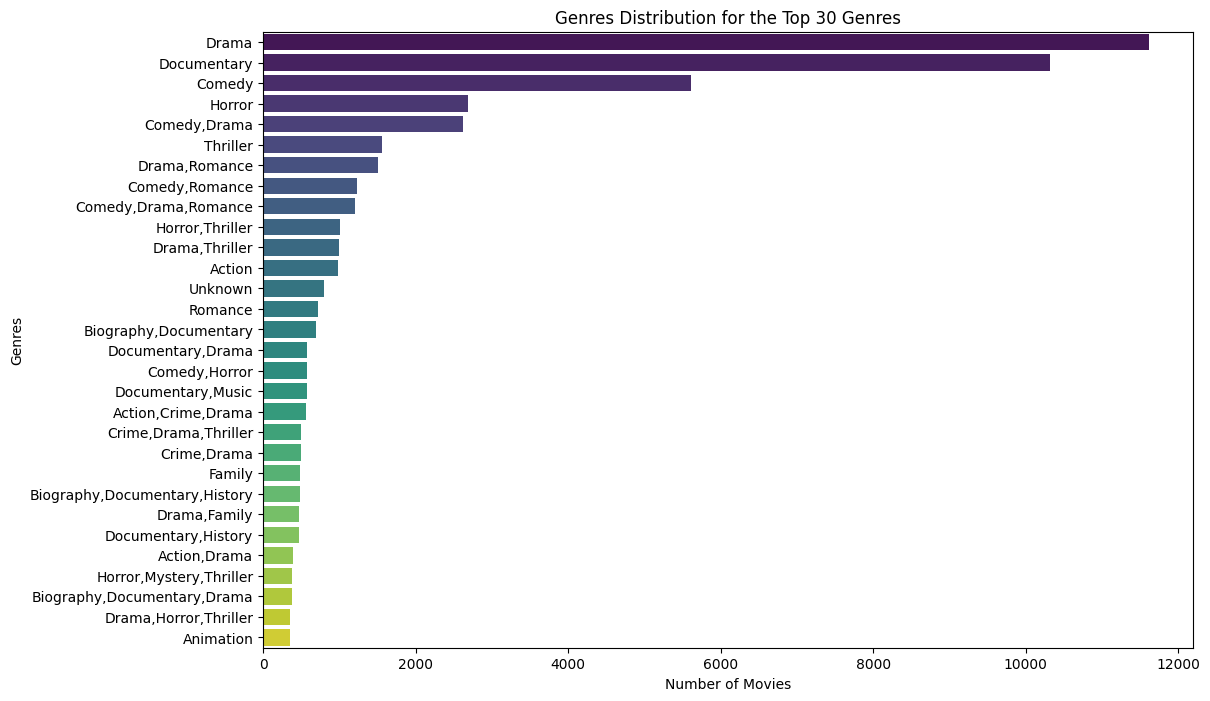

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\2748469967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=average_rating2.head(30).values, y= average_rating2.head(30).index, palette='viridis')# this boxplot shows that the average rating of the genres is between 6.5 and 7.5


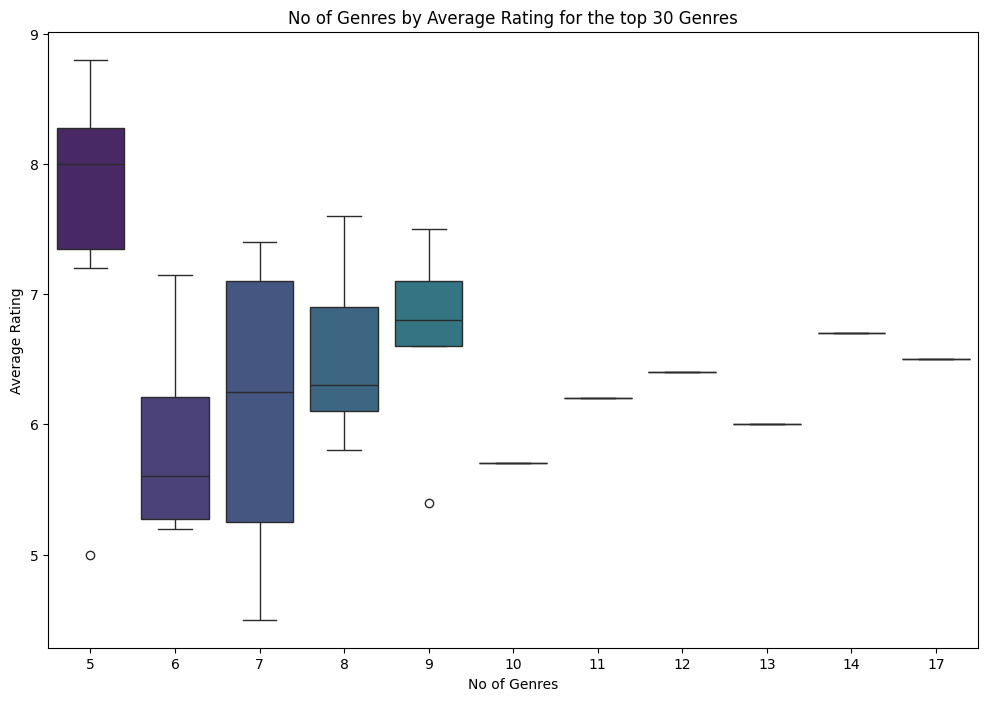

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\2748469967.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating2.head(30).index.sort_values(ascending= False), y= average_rating.head(30).index, palette='viridis')


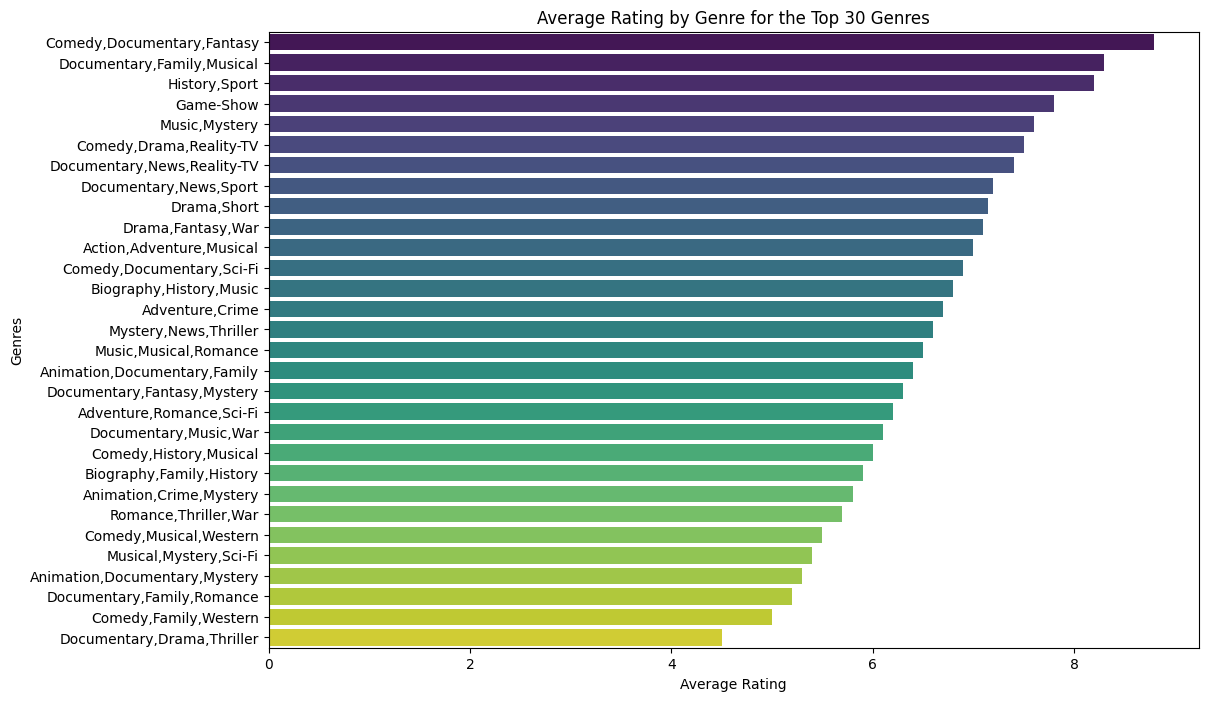

In [26]:


#create a graph to see how plot the top 30 genres in the dataset
plt.figure(figsize=(12,8))
sns.barplot(x=unique_values.head(30).values, y= unique_values.head(30).index, palette='viridis')
plt.title('Genres Distribution for the Top 30 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()


#plot the no of genres by average rating of the top 30 genres
plt.figure(figsize=(12,8))
#sns.barplot(x=average_rating2.head(30).values, y= average_rating.head(30).index, palette='viridis')
sns.boxplot(x=average_rating2.head(30).values, y= average_rating2.head(30).index, palette='viridis')# this boxplot shows that the average rating of the genres is between 6.5 and 7.5
plt.title('No of Genres by Average Rating for the top 30 Genres')
plt.xlabel('No of Genres')
plt.ylabel('Average Rating')
plt.show()


##plot the average rating of the top 30 genres
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating2.head(30).index.sort_values(ascending= False), y= average_rating.head(30).index, palette='viridis')
plt.title('Average Rating by Genre for the Top 30 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()



- In the plots above, We have first, analyzed the genres to see which ones have the highest number of movies. And that's Drama.
- Afterwards, we have analyzed each genre, counted the average ratings of each genre and arranged the count in descending order. We have discovered that 17 genres have movies with an  average rating of about 6.5 and 5 genres have movies with  an average rating of between 5.5 and 7. 
- Lastly, we have plotted a bar graph to see these genres and their average ratings.


- Let's analyze each year from 2019 t0 2015 to see genres that had the highest ratings.

In [27]:
#check the average rating of the genres in start year 2019
average_rating_2019 = movie_data[movie_data['start_year'] == 2019].groupby('genres')['averagerating'].mean().sort_values(ascending=False)
average_rating_2019.head(10)

genres
Biography,Documentary,Drama     9.800000
Comedy,Documentary,Sport        9.700000
Documentary,Drama,Sport         9.600000
Documentary,History,War         9.200000
Crime,Documentary,Drama         9.200000
Drama,Family,Music              9.100000
Adventure,Drama,Sci-Fi          8.700000
Music                           8.566667
Biography,Comedy,Documentary    8.550000
Comedy,Family,Thriller          8.500000
Name: averagerating, dtype: float64

In [28]:
#check the average rating of the genres in start year 2018
average_rating_2018 = movie_data[movie_data['start_year'] == 2018].groupby('genres')['averagerating'].mean().sort_values(ascending=False)

#check the average rating of the genres in start year 2017
average_rating_2017 = movie_data[movie_data['start_year']== 2017].groupby('genres')['averagerating'].mean().sort_values(ascending=False)

#check the average rating of the genres in start year 2016
average_rating_2016 = movie_data[movie_data['start_year']== 2016].groupby('genres')['averagerating'].mean().sort_values(ascending=False)

#check the average rating of the genres in start year 2015
average_rating_2015 = movie_data[movie_data['start_year']== 2015].groupby('genres')['averagerating'].mean().sort_values(ascending=False)


In [29]:
#print the average rating of the genres in 2018, 2017, 2016, 2015
print("average_rating_2018:",average_rating_2018.head(10))
print("\naverage_rating_2017:",average_rating_2017.head(10))


average_rating_2018: genres
Action,Documentary             9.4
Comedy,Fantasy,Musical         9.1
Comedy,Drama,Sci-Fi            9.0
Drama,Short                    8.8
Action,Comedy,Musical          8.7
Action,Adventure,Musical       8.7
Biography,Crime,Documentary    8.7
Comedy,Romance,Sci-Fi          8.7
Documentary,Drama,Sport        8.6
Documentary,History,Music      8.6
Name: averagerating, dtype: float64

average_rating_2017: genres
Documentary,Musical              9.40
Documentary,Family,Musical       9.30
Documentary,Music,War            9.15
Biography,Documentary,Romance    9.00
Adventure,Drama,War              8.90
Documentary,News,Sport           8.80
Comedy,Documentary,Horror        8.60
Comedy,Documentary,Sci-Fi        8.50
Documentary,History,Horror       8.40
Documentary,Music,Sport          8.40
Name: averagerating, dtype: float64


In [30]:
print("\naverage_rating_2016:",average_rating_2016.head(10))
print("\naverage_rating_2015:",average_rating_2015.head(10))


average_rating_2016: genres
Action,Documentary               9.4
Crime,Documentary,News           9.4
History,Sport                    9.2
Biography,Documentary,Musical    9.1
Drama,Fantasy,War                8.8
Fantasy,Musical                  8.8
Comedy,Drama,Reality-TV          8.8
Documentary,Family,Sport         8.7
Action,Adventure,Biography       8.7
Documentary,Drama,Reality-TV     8.7
Name: averagerating, dtype: float64

average_rating_2015: genres
Comedy,Documentary,Fantasy        9.4
Drama,Family,Musical              8.7
Animation,Biography,Comedy        8.5
Documentary,Drama,Mystery         8.5
Mystery,Romance                   8.4
Biography,Family,History          8.3
Animation,Fantasy,Romance         8.2
Action,Documentary,Family         8.2
Biography,Documentary,Thriller    8.2
Comedy,Musical,Western            8.2
Name: averagerating, dtype: float64


- Based on the above, it is clear that 3 combination of genres in 2019 had the highest ratings of 9.6, 9.7 and 9.8 out of the 5 years.
- These genres are :
 - Biography,Documentary,Drama     9.8
 - Comedy,Documentary,Sport        9.7
 - Documentary,Drama,Sport         9.6

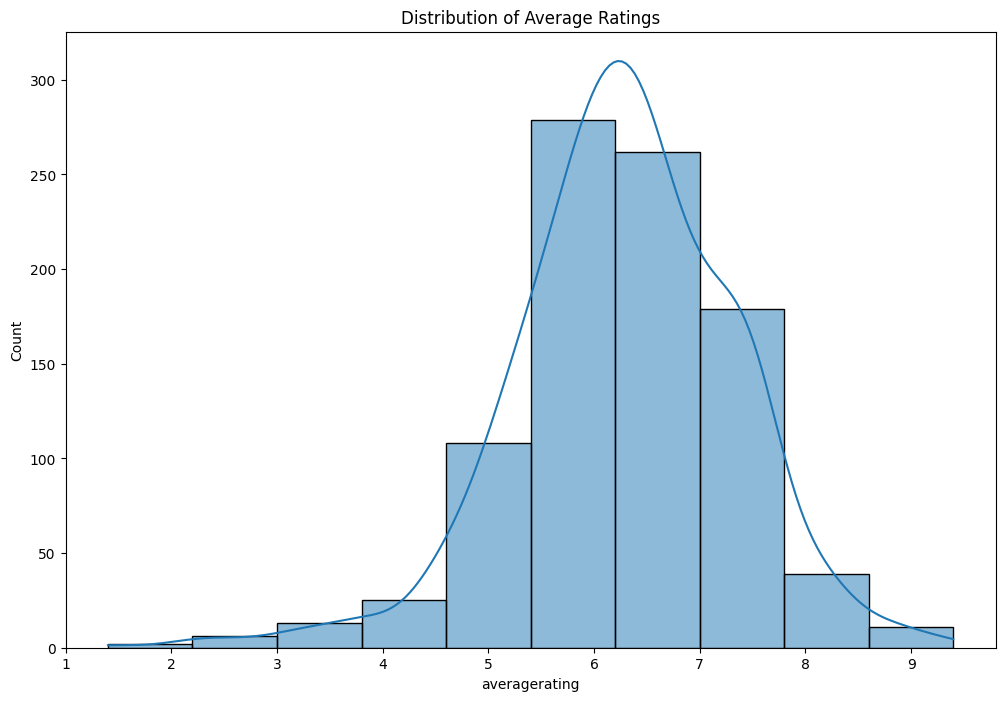

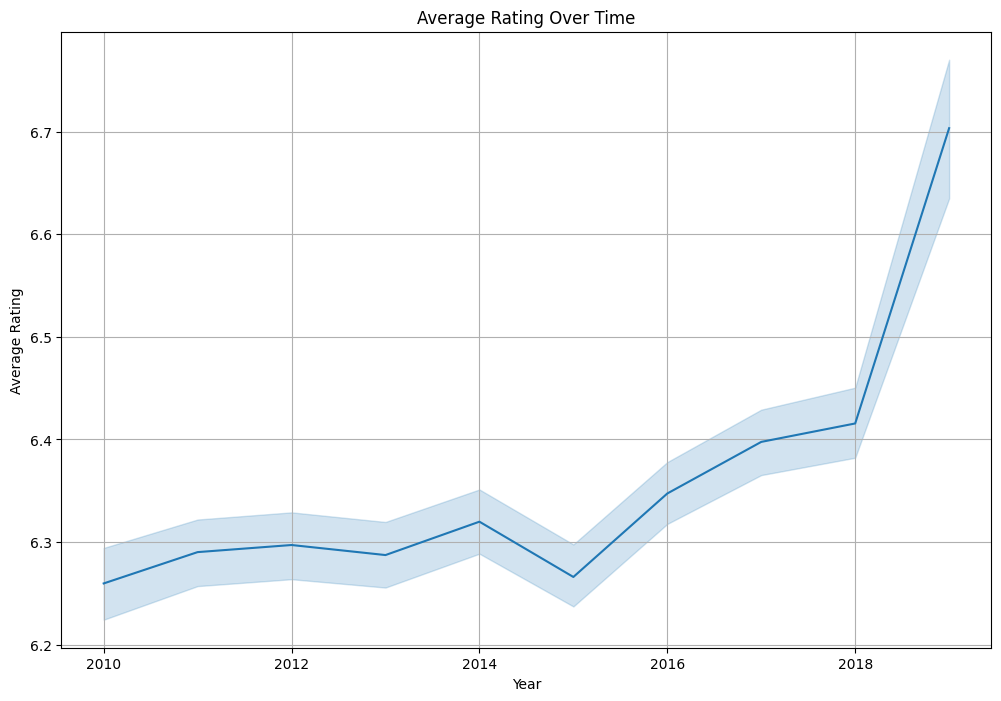

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\994315618.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_2019.head(30).values, y= average_rating_2019.head(30).index, palette='viridis')


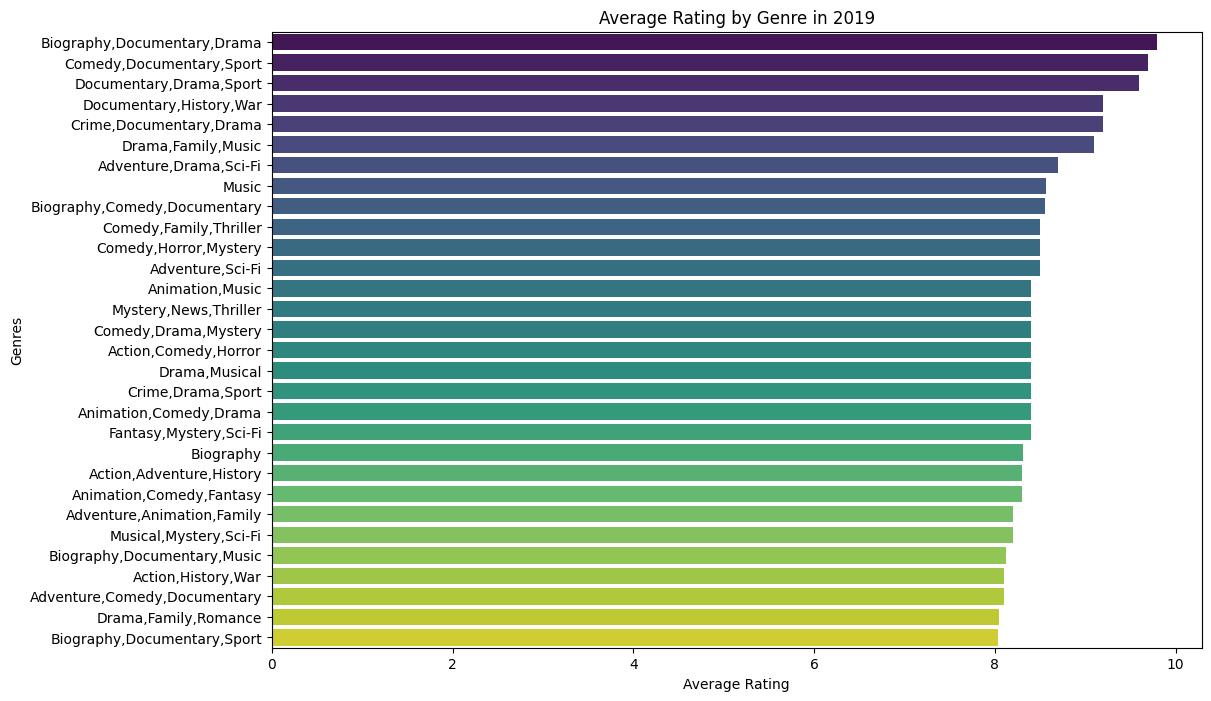

In [31]:
#plot  Distribution of Average Ratings
plt.figure(figsize=(12, 8))
sns.histplot(average_rating, bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.show()

# plot the Average Rating Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(x=movie_data['start_year'], y=movie_data['averagerating'])
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.grid(True)
plt.show()

#plot the average rating of the genres in start year 2019
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating_2019.head(30).values, y= average_rating_2019.head(30).index, palette='viridis')
plt.title('Average Rating by Genre in 2019')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()




- In the above, we see that the average ratings of these genres follow an almost normal distribution the highest average being about 6.5
- We also see that in the second plot, the average ratings increase and drop steadily but in the year 2019, the average ratings shot up drastically.
- In the last graph, we understand why the average rating shot up drastically and that's because combination of genres in 2019,the top 30 combinations had an average rating grater than 8.1 to around 9.8

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\77152608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_2018.head(30).values, y= average_rating_2018.head(30).index, palette='viridis')


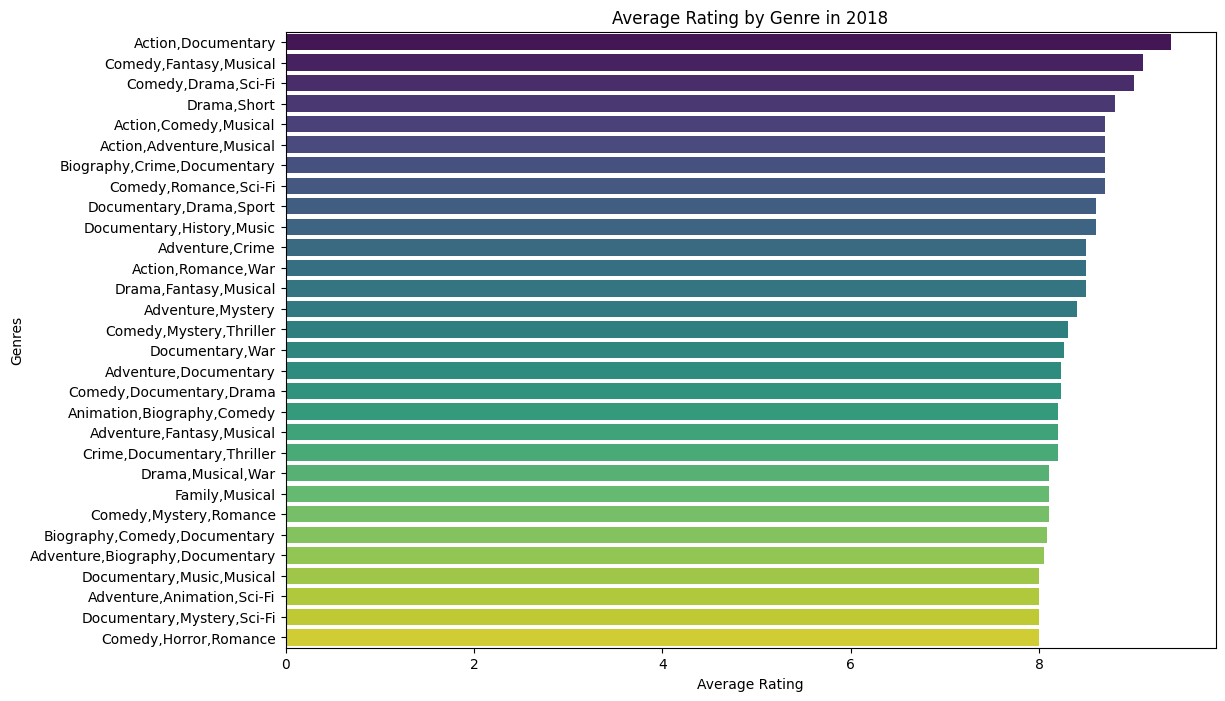

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\77152608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_2017.head(30).values, y= average_rating_2017.head(30).index, palette='viridis')


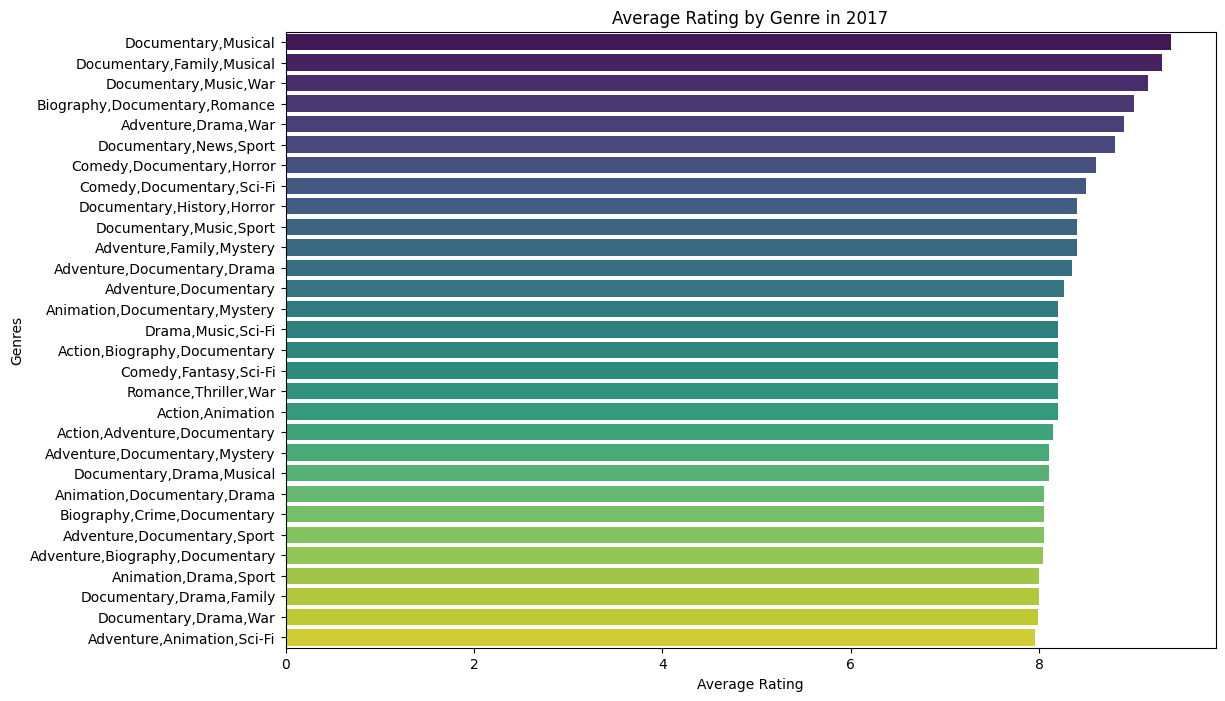

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\77152608.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_2016.head(30).values, y= average_rating_2016.head(30).index, palette='viridis')


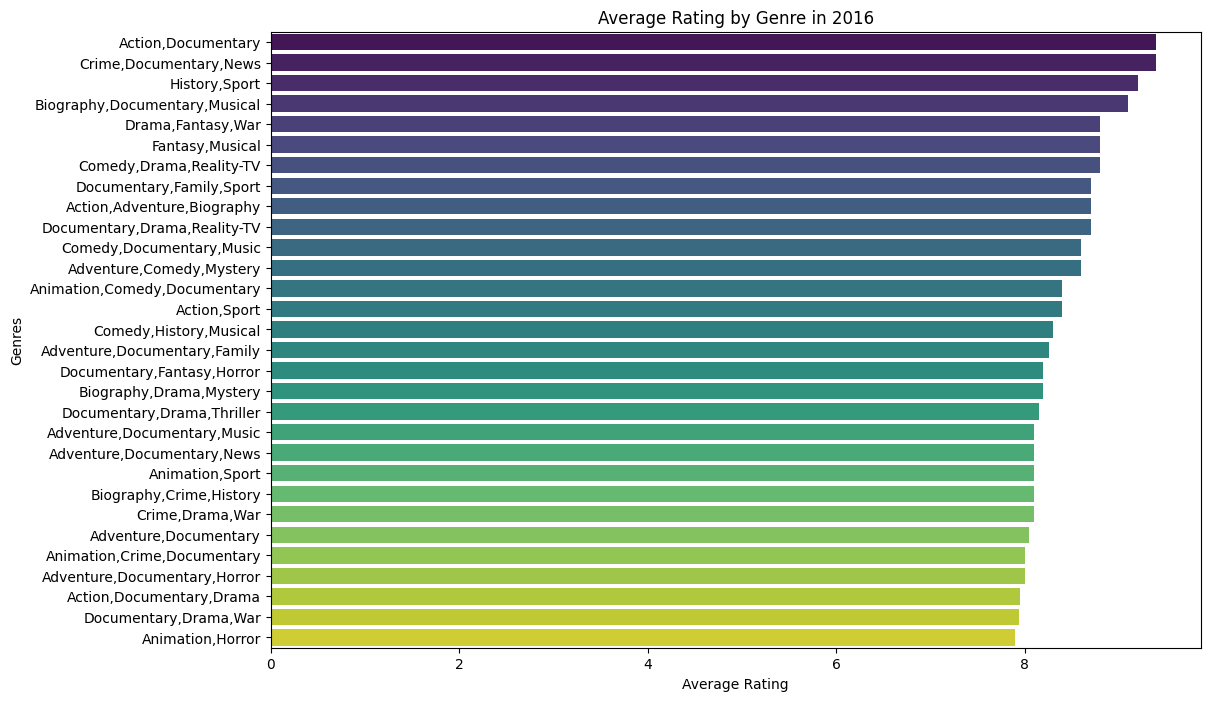

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\77152608.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_2015.head(30).values, y= average_rating_2015.head(30).index, palette='viridis')


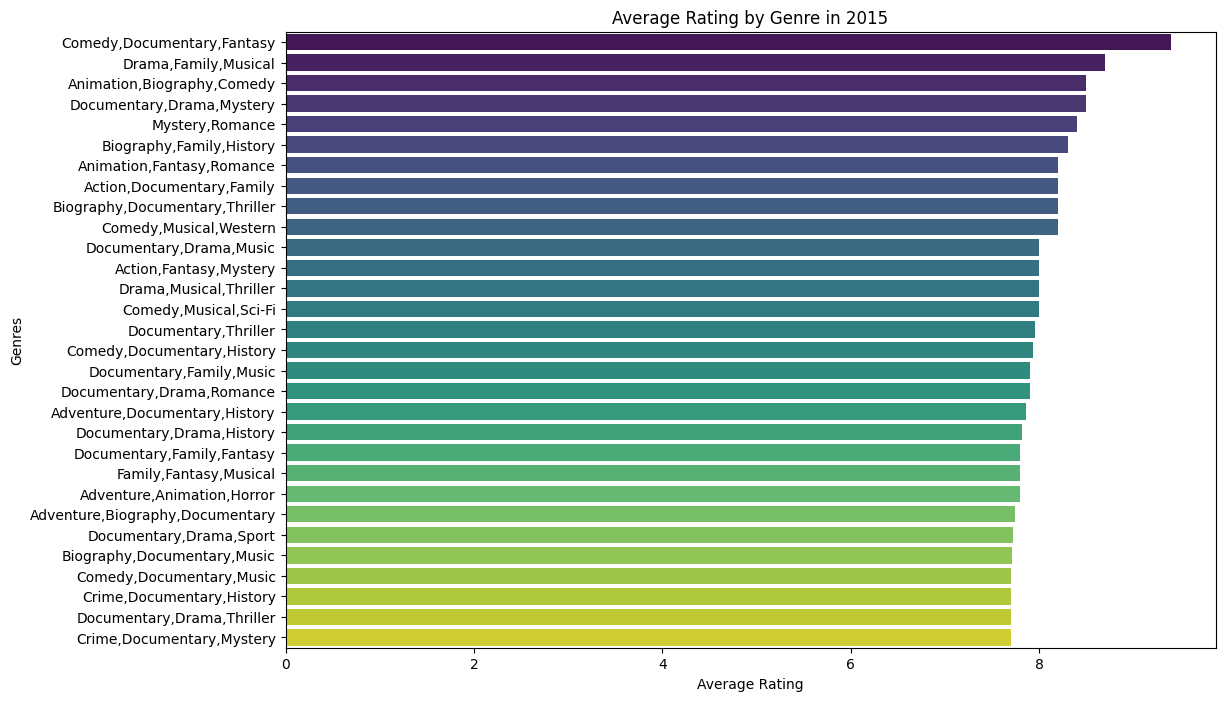

In [32]:
#plot the average rating of the genres in start year 2018
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating_2018.head(30).values, y= average_rating_2018.head(30).index, palette='viridis')
plt.title('Average Rating by Genre in 2018')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

#plot the average rating of the genres in start year 2017
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating_2017.head(30).values, y= average_rating_2017.head(30).index, palette='viridis')
plt.title('Average Rating by Genre in 2017')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

#plot the average rating of the genres in start year 2016
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating_2016.head(30).values, y= average_rating_2016.head(30).index, palette='viridis')
plt.title('Average Rating by Genre in 2016')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()


#plot the average rating of the genres in start year 2015
plt.figure(figsize=(12,8))
sns.barplot(x=average_rating_2015.head(30).values, y= average_rating_2015.head(30).index, palette='viridis')
plt.title('Average Rating by Genre in 2015')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()



- For the years 2015 to 2018, we see that the highest combination of genres had an average rating of 9.4 for all of them.

* Analyze the last 5 years from 2015 to 2019 and see which genres had the highes ratings out of the 5 years.



In [33]:
# Filter the data for years 2015 to 2019
filtered_data = movie_data[movie_data['start_year'].isin([2015, 2016, 2017, 2018, 2019])]

# Group by genres and start_year, then calculate the mean average rating
grouped_data = filtered_data.groupby(['genres', 'start_year'])['averagerating'].mean().reset_index()

# Filter the genres with an average rating of 9.0 and above
top_genres = grouped_data[grouped_data['averagerating'] >= 8.0].sort_values(ascending=False, by='averagerating')

# Display the top genres
print(top_genres)


                           genres  start_year  averagerating
857   Biography,Documentary,Drama        2019            9.8
1043     Comedy,Documentary,Sport        2019            9.7
1467      Documentary,Drama,Sport        2019            9.6
1024   Comedy,Documentary,Fantasy        2015            9.4
214            Action,Documentary        2016            9.4
...                           ...         ...            ...
458   Adventure,Biography,History        2019            8.0
301        Action,Fantasy,Mystery        2015            8.0
1552    Documentary,Music,Musical        2018            8.0
439    Adventure,Animation,Sci-Fi        2018            8.0
296        Action,Fantasy,History        2019            8.0

[137 rows x 3 columns]


- We see that the 2019 top genres take the lead.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\4279083523.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=top_genres['averagerating'].head(20),y=top_genres['genres'].head(20), palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22824\4279083523.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


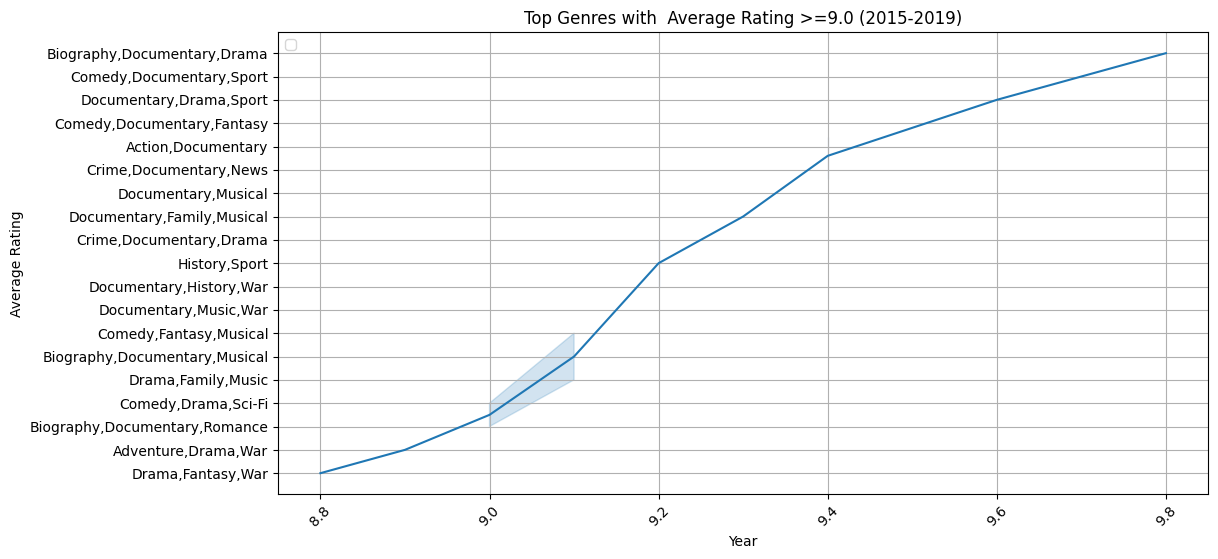

In [34]:
#  Visualize the top genres per year using a bar plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=top_genres['averagerating'].head(20),y=top_genres['genres'].head(20), palette='viridis')
#draw horizontal and vertical lines for each genre to know the average rating
#for i, genre in enumerate(top_genres['genres'].head(20)):
    #plt.axhline(i, color='gray', linestyle='--', lw=0.5)
    #plt.axvline(top_genres['averagerating'].iloc[i], color='gray', linestyle='--', lw=0.5)# I have used the iloc method to get the index of the genre
plt.title('Top Genres with  Average Rating >=9.0 (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


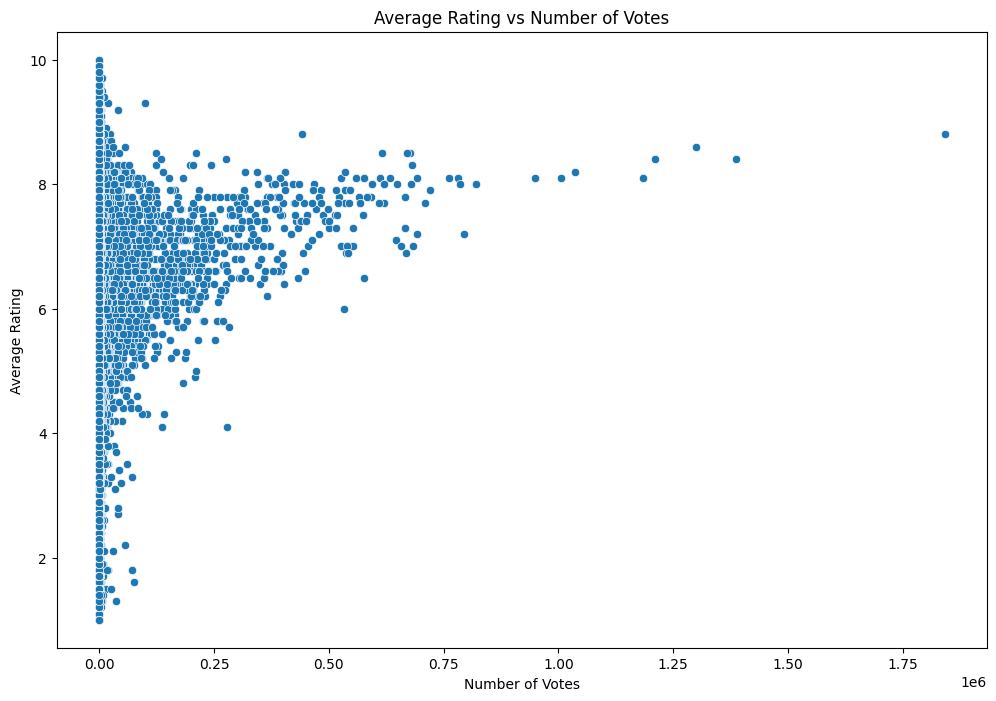

In [35]:
#plot a scatter plot of the average rating and the number of votes
plt.figure(figsize=(12,8))
sns.scatterplot(x=movie_data['numvotes'], y=movie_data['averagerating'])
plt.title('Average Rating vs Number of Votes')
plt.xlabel('Number of Votes')           
plt.ylabel('Average Rating')
plt.show()


- based on the above scatter plot we can see that the average rating is between 6.5 and 7.5 and the number of votes is between 0 and 1000000. 

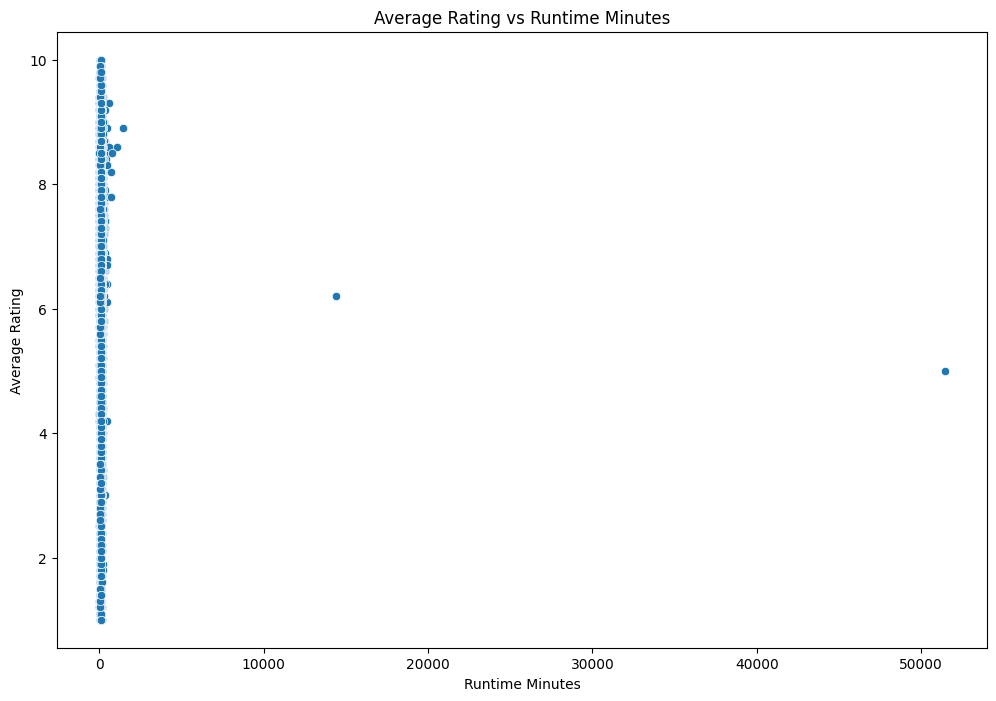

In [36]:
#plot a scatter plot of the average rating and the runtime minutes
plt.figure(figsize=(12,8))
sns.scatterplot(x=movie_data['runtime_minutes'], y=movie_data['averagerating'],)
plt.title('Average Rating vs Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')
plt.show()


- based on the above scatter plot we can see that the average rating is between 6.5 and 7.5 with a runtime of about 100 minutes. Meaning most movies that have an average rating between 6.5 and 7.5 have a runtime of about 100 minutes. About 1 hour 30 seconds.

In [37]:
#get the runtime minutes of the top 10 genres from 2015 to 2019
top_genres = top_genres['genres'].head(10)
top_genres_runtime = filtered_data[filtered_data['genres'].isin(top_genres)].groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False)
top_genres_runtime

genres
Crime,Documentary,News         97.500000
Action,Documentary             87.333333
Biography,Documentary,Drama    83.831872
Crime,Documentary,Drama        82.056536
Documentary,Drama,Sport        79.200000
Documentary,Musical            75.552865
Comedy,Documentary,Fantasy     70.000000
Comedy,Documentary,Sport       66.593624
Documentary,Family,Musical     59.000000
Name: runtime_minutes, dtype: float64

In [38]:
#get the number of votes of the top 10 genres from 2015 to 2019
top_genres_votes = filtered_data[filtered_data['genres'].isin(top_genres)].groupby('genres')['numvotes'].mean().sort_values(ascending=False)
top_genres_votes

genres
Biography,Documentary,Drama    379.150000
Documentary,Drama,Sport        193.200000
Comedy,Documentary,Sport       139.500000
Crime,Documentary,Drama         99.285714
Documentary,Musical             81.923077
Action,Documentary              53.333333
Documentary,Family,Musical      19.000000
Crime,Documentary,News           8.500000
Comedy,Documentary,Fantasy       5.000000
Name: numvotes, dtype: float64

- On analysing the last 5 years, we saw that the first three combination of genres did very well in 2019 gaining an average rating of 9.8,9.7 and 9.6 but on checking the number of people who voted, they are not as many compared to other genres. So can we really say the are the top genres? Let's take a look.

In [79]:
#get the number of votes for all the genres and the average rating
votes_rating = movie_data.groupby(['genres','numvotes']) ['averagerating'].mean().sort_values(ascending=False)
#print all the genres and the number of votes   
votes_rating.head(25)


genres                           numvotes
Comedy,Drama                     5600        9.7
Documentary,Family,Romance       25          9.7
Comedy,Documentary,Sport         22          9.7
Biography,Drama,History          2604        9.6
Action                           427         9.6
Documentary,Drama,Music          78          9.6
Animation,Documentary,Family     5           9.6
Comedy,Drama,Family              808         9.6
Adventure,Biography,Documentary  1339        9.6
Comedy,Drama,Family              86          9.5
Documentary                      829         9.5
Biography                        65          9.5
Comedy,Drama,Musical             354         9.5
Drama,History                    6509        9.5
Drama,War                        251         9.4
Action,Documentary               5           9.4
Adventure,Family                 797         9.4
Documentary,Sport                104         9.4
Documentary,History              90          9.4
Documentary,Drama,War      

- When we consider average rating we see that Comedy, Drama takes the lead followed by Documentary.
- But we see the number of votes are very few, so the above anaylsis is not valid.

- let's try weighted rating instead- considering both the number of votes and the average rating.
- This is because, a high number of votes means the movie has a greater appeal with a diverse portfolio compared to low number of votes.

In [83]:
movie_data['weighted_rating'] = (movie_data['averagerating'] * movie_data['numvotes']) / movie_data['numvotes'].sum()

filtered_data = movie_data[(movie_data['averagerating'] >= 7) & (movie_data['numvotes'] > 10000)]

top_genres = filtered_data.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False).head(20)
print(top_genres)



genres
Drama,Western                 0.039101
Adventure,Drama,Sci-Fi        0.031922
Action,Adventure,Sci-Fi       0.017637
Adventure,Family,Fantasy      0.016047
Action,Adventure,Horror       0.014895
Adventure,Fantasy             0.014712
Adventure,Mystery,Sci-Fi      0.014490
Action,Adventure,Fantasy      0.013897
Drama,Sci-Fi,Thriller         0.013631
Adventure,Fantasy,Mystery     0.012590
Adventure,Drama,Fantasy       0.012154
Action,Adventure,Biography    0.012019
Action,Adventure,Comedy       0.011495
Action,Adventure,Thriller     0.011449
Action,Adventure,Crime        0.011360
Mystery,Sci-Fi,Thriller       0.011313
Action,Drama,Sci-Fi           0.010223
Horror,Thriller               0.010134
Drama,Mystery,Sci-Fi          0.009766
Action,Drama,Mystery          0.009283
Name: weighted_rating, dtype: float64


- Adventure is a common theme across many top genres, indicating a strong audience preference for adventurous stories.
- Sci-Fi and Fantasy elements also appear frequently, suggesting an interest in imaginative and speculative storytelling.
- Combining Genres: Genres that combine multiple elements (e.g., Adventure, Drama, Sci-Fi) tend to perform well, indicating that audiences appreciate complex and layered narratives.

# Business Recommendations:
1. Focus on Adventure Films with Sci-Fi and Fantasy Elements.
- Rationale: Adventure, Sci-Fi, and Fantasy themes are prominent among top-performing genres. These genres offer broad appeal and the potential for high box office returns. 
- Ensure the movies have runtime of about 100minutes. 